# Analyzing Football Game Event Data Using `statsbombpy` and `mplsoccer` in Python.



# Introduction
The use of `Data Science and Analytics` is making great strides in the field of Professional Sports, including football.
The scope of data analysis in football covers a wide range of topics including `game event analysis, scouting players for teams, tactical decision making and visualizing the tactics`.

In this project, I am going to analyze a game using the events data of the game. As an example we are going to make use of events data from the final of `International FIFA World Cup 2022.` The match was played at Lusail Stadium in Lusail, Qatar, on 18 December 2022, the Qatari National Day, and was contested by `Argentina` and defending champions `France`.

By leveraging the event data and relevant information provided, I have built a comprehensive `Player Performance Analysis tool` that helps teams and scouts assess player performance across different matches and gain valuable insights into player strengths and weaknesses.


# Implementation
The data for the `International FIFA World Cup 2022` season has been released from statsbomb for free. There are multiple ways to access the data. 
1. One way is to download the data from statsbomb data repository on github [here!](https://github.com/statsbomb/statsbombpy). This way is a bit cumbersome since the size of data is big and the parsing is relatively not simple. 
2. The second way is to use the [statsbombpy](https://github.com/statsbomb/statsbombpy) package from statsbomb in python. Statsbombpy is a Python package that allows users to easily stream StatsBomb data into Python using your log in credentials for the API or free data from their github page
3. We will be using a third way, which is accessing the data through mplsoccer library, [check documentation](https://mplsoccer.readthedocs.io/en/latest/index.html) in python since it prevents the clutter of using more libraries.

# Import All The Required Libraries

In [1]:
from statsbombpy import sb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os

# importing the data parser through mplsoccer (alternative to the official statsbombpy package)
parser  = Sbopen()

# To check available competitions in statsbomb repository:

In [2]:
parser.competition()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


# Now let’s check the International Fifa World Cup Seasons Available in the Data

In [3]:
competitions = parser.competition()
competitions[competitions.competition_name=='FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
26,43,106,International,FIFA World Cup,male,False,True,2022,2023-08-12T16:44:27.619465,2023-08-17T15:55:15.164685,2023-08-17T15:55:15.164685,2023-08-12T16:44:27.619465
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
28,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
29,43,54,International,FIFA World Cup,male,False,True,1986,2023-06-28T11:20:34.252935,2021-06-13T16:17:31.694,None,2023-06-28T11:20:34.252935
30,43,51,International,FIFA World Cup,male,False,True,1974,2023-07-17T23:19:58.853207,2021-06-13T16:17:31.694,None,2023-07-17T23:19:58.853207
31,43,272,International,FIFA World Cup,male,False,True,1970,2023-07-17T23:24:45.579886,None,None,2023-07-17T23:24:45.579886
32,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
33,43,269,International,FIFA World Cup,male,False,True,1958,2023-06-26T10:33:08.214831,None,None,2023-06-26T10:33:08.214831


# Now, we check the matches of that season using the competiton_id and season_id.

In [4]:
parser.match(competition_id =43,season_id = 106)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,...,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,2022-11-22 18:00:00,0,0,available,available,2023-04-19 06:53:07.045195,2023-04-27 00:49:30.005344,1,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1701.0,Chris Beath,14.0,Australia
60,3857262,2022-12-02,2022-12-02 17:00:00,2,1,available,available,2023-03-17 22:58:19.035038,2023-04-26 23:48:08.999798,3,...,10,Group Stage,94425,Education City Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina
61,3857261,2022-11-29,2022-11-29 21:00:00,0,3,available,available,2023-03-27 07:45:00.892102,2023-04-27 00:02:44.241621,3,...,10,Group Stage,1000793,Ahmad bin Ali Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia
62,3857255,2022-12-01,2022-12-01 21:00:00,2,1,available,available,2023-03-30 12:03:47.965683,2023-04-26 23:51:48.352990,3,...,10,Group Stage,1000253,Sheikh Khalifa International Stadium,185,Qatar,2366.0,Victor Miguel de Freitas Gomes,211.0,South Africa


# Now we grab the final game events using the match_id.

- df, df_related, df_freeze, df_tactics: These variables are used to store different aspects of the parsed events data.

- `df`: This stores the main events data for the match, which can include actions like passes, shots, tackles, fouls, and more.

- `df_related`: This variable stores related events or supplementary data associated with the main events, such as player actions, player positions, or ball positions.

- `df_freeze`: This variable stores a "freeze frame" of the match, which could include a snapshot of the players' positions on the field at a specific moment in the game.

- `df_tactics`: This variable stores tactical information or data related to formations, strategies, or other tactical aspects of the match.

In [5]:
df, df_related, df_freeze, df_tactics = parser.event(3869685)

# Match Lineup and Facts

In [6]:
# Specify the match ID
match_id = 3869685

# Retrieve the lineups data for the specified match
lineups_data = sb.lineups(match_id=match_id)

# Create an empty list to store DataFrames for each team
team_dfs = []

# Iterate through the teams in the data
for team_name, team_data in lineups_data.items():
    # Create a DataFrame from the player data for the team
    team_df = pd.DataFrame(team_data)
    # Add a 'Team' column to identify the team
    team_df['Team'] = team_name
    # Append the DataFrame to the list
    team_dfs.append(team_df)

# Concatenate the DataFrames for all teams into one DataFrame
lineups_df = pd.concat(team_dfs, ignore_index=True)

# Display the DataFrame as a table
print(lineups_df)

    player_id                      player_name      player_nickname  \
0        2972                    Marcus Thuram                 None   
1        3009             Kylian Mbappé Lottin        Kylian Mbappé   
2        3026                    Adrien Rabiot                 None   
3        3099                      Hugo Lloris                 None   
4        3379                  Alphonse Areola                 None   
5        3543                   Steve Mandanda                 None   
6        3604                   Olivier Giroud                 None   
7        4445                     Jules Koundé                 None   
8        5476                  Benjamin Pavard                 None   
9        5477                  Ousmane Dembélé                 None   
10       5485                   Raphaël Varane                 None   
11       5487                Antoine Griezmann                 None   
12       6704  Theo Bernard François Hernández       Theo Hernández   
13    

# 1. Plotting Pass Maps for Individual Players
- Pass maps are used to analyze passing patterns between players.
Now to plot pass maps, we can either plot it for each player separately or for all players.

The process to plot individual pass map of the player is:

1. Filter the data by `type_name` as `Pass` and also by the `player name`. Save it in another data frame.
2. Create an instance of class `Pitch`.(You can read the [mpl soccer documentation](https://mplsoccer.readthedocs.io/en/latest/index.html) for understanding how to change how the pitch looks)
3. Iterate over all rows of events. Get the `x` and `y` co-ordinates of the pass origin and then the distance travelled in the direction using the subtraction of `pass end` co-ordinates and `pass start` co-ordinates.
4. Now within that loop, check if the pass was incomplete or not. Based on that plot it using the ‘arrow’ function with color `red` or `green`. We also plot a scatter bubble at the pass start point.
5. After the loop, add a title text for the image.

Lionel Andrés Messi Cuccittini - Complete Passes: 50, Incomplete Passes: 10
Olivier Giroud - Complete Passes: 55, Incomplete Passes: 14


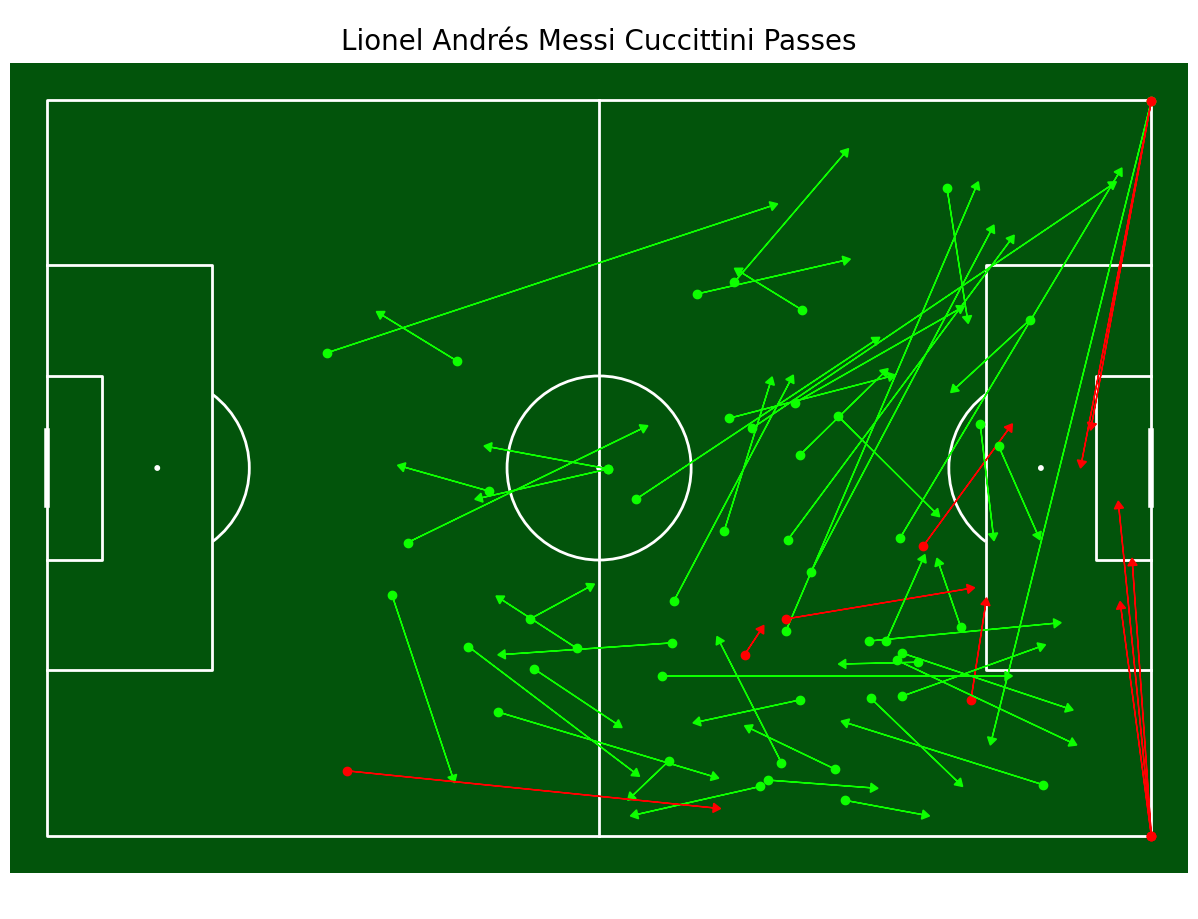

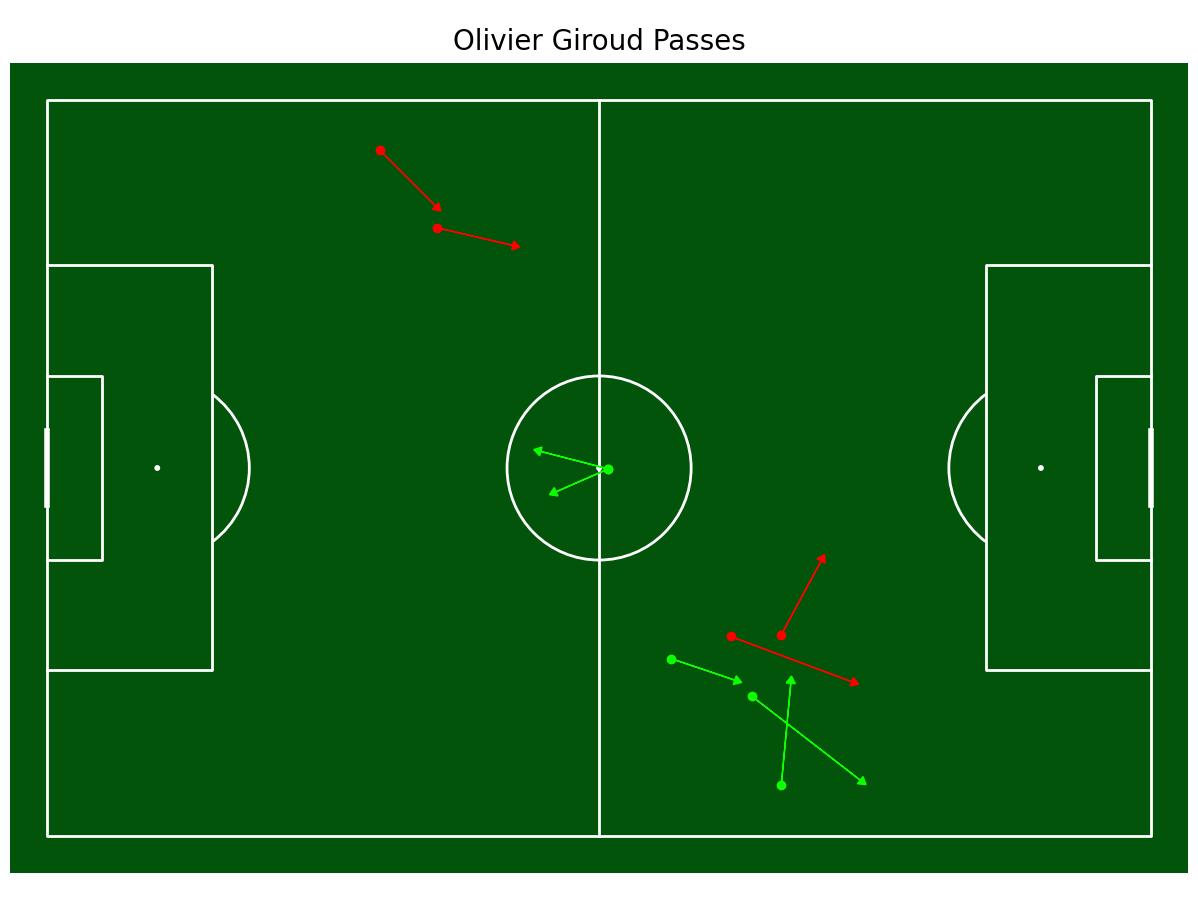

In [7]:
# Create global counters for complete and incomplete passes
complete_pass_count = 0
incomplete_pass_count = 0

# Function to generate a pass map for a player
def generatePlayerPassMap(player_name):
    global complete_pass_count, incomplete_pass_count  # Make the counters accessible within the function

    player_filter = (df.type_name == 'Pass') & (df.player_name == player_name)
    player_df = df.loc[player_filter, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]

    pitch = Pitch(line_color='white', pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

    for i in player_df.index:
        x = player_df['x'][i]
        y = player_df['y'][i]
        dx = player_df['end_x'][i] - player_df['x'][i]
        dy = player_df['end_y'][i] - player_df['y'][i]
        
        if player_df['outcome_name'][i] != 'Incomplete':
            ax['pitch'].arrow(x, y, dx, dy, color='#0dff00', length_includes_head=True, head_width=1, head_length=0.8, label='Complete Pass')
            pitch.scatter(player_df['x'][i], player_df['y'][i], color='#0dff00', ax=ax['pitch'])
            complete_pass_count += 1
        else:
            ax['pitch'].arrow(x, y, dx, dy, color='red', length_includes_head=True, head_width=1, head_length=0.8, label='Incomplete Pass')
            pitch.scatter(player_df['x'][i], player_df['y'][i], color='red', ax=ax['pitch'])
            incomplete_pass_count += 1

    
    fig.suptitle(player_name + " Passes", fontsize=20)
    print(f"{player_name} - Complete Passes: {complete_pass_count}, Incomplete Passes: {incomplete_pass_count}")


# Generate pass maps and calculate pass counts for players
generatePlayerPassMap("Lionel Andrés Messi Cuccittini")
generatePlayerPassMap("Olivier Giroud")


# 2. Plotting Pass Maps for the Team
Now, to generate the passing maps of all players of a team, we create a grid of plots and iterate over all players of that team. The code is as follows:

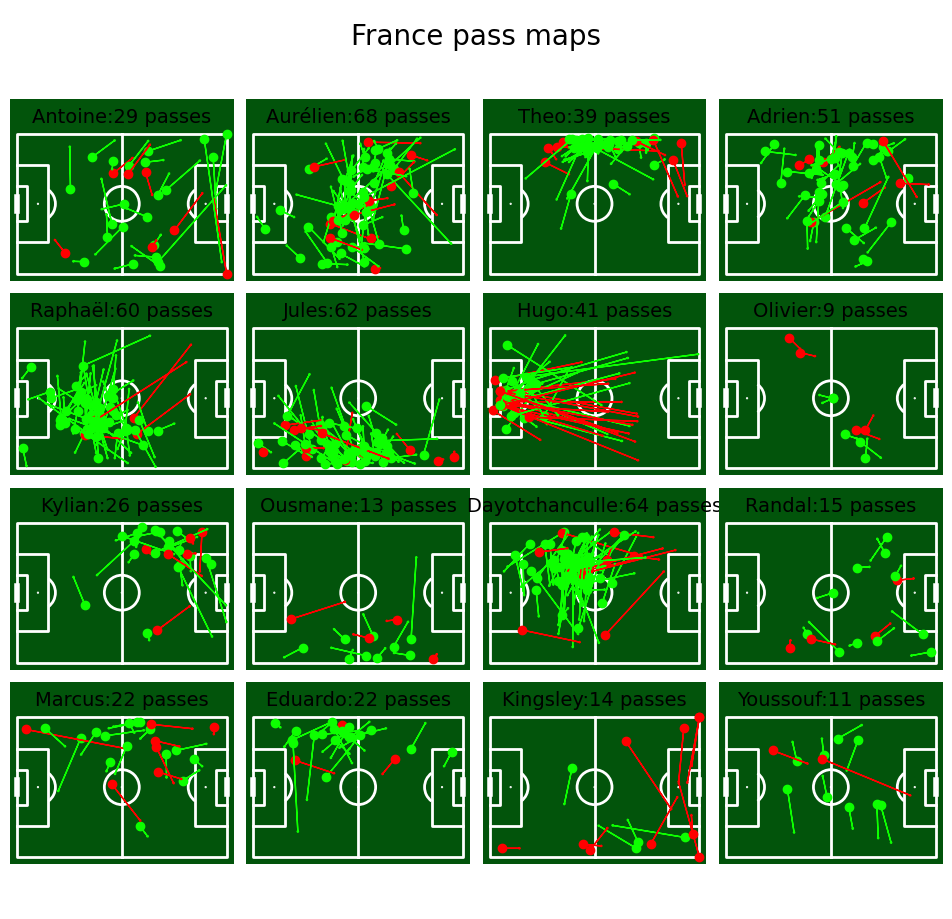

<Figure size 1400x1000 with 0 Axes>

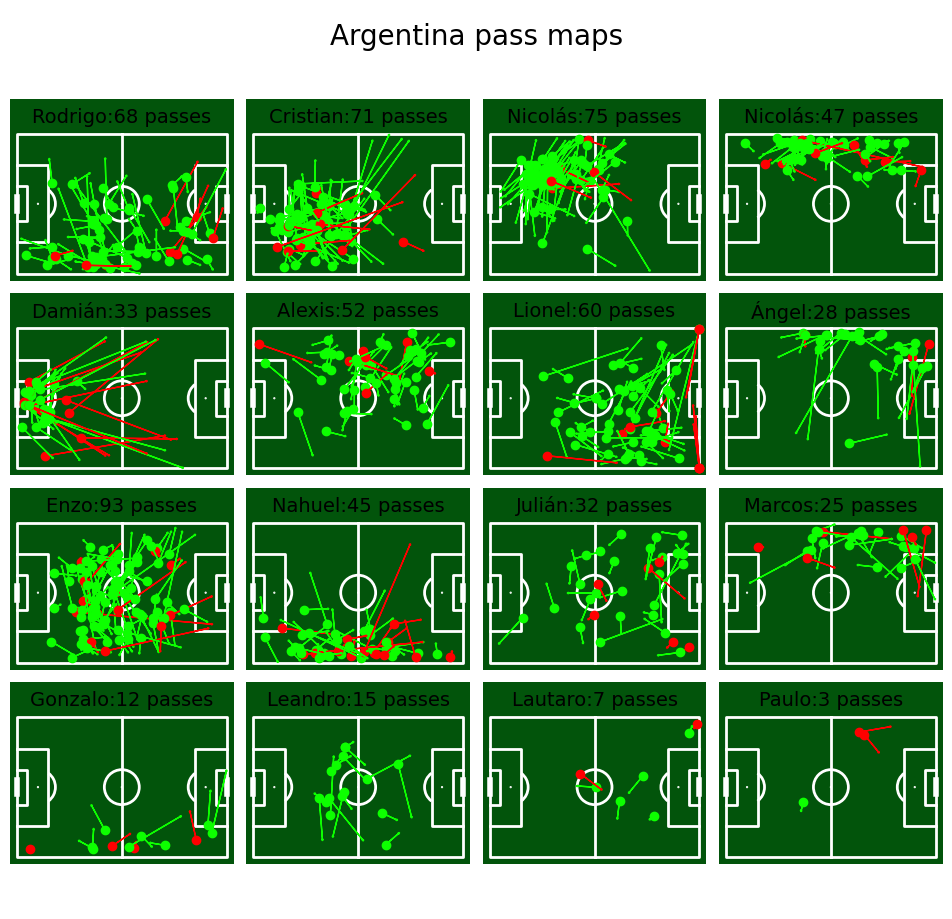

<Figure size 1400x1000 with 0 Axes>

In [8]:

def generatePlayerPassMapsGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b',pad_top=20)
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[0]+":"+str(len(player_df))+" passes",ha='center', va='center', fontsize=14)
        #scatter -  plots the player position with 0.2 alpha(visibility)
        #pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
        #plot pass arrows
        #pitch.arrows(player_df.x, player_df.y,player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)
        # plotting arrows one by one, red or green based on if its incomplete or not
        for i in player_df.index:
            x=player_df['x'][i]
            y = player_df['y'][i]
            dx = player_df['end_x'][i] - player_df['x'][i]
            dy = player_df['end_y'][i] - player_df['y'][i]
            if df['outcome_name'][i] != 'Incomplete':
                ax.arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='#0dff00',ax=ax)
            else:
                ax.arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
                pitch.scatter(player_df['x'][i],player_df['y'][i],color='red',ax=ax)


    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" pass maps", ha='center', va='center', fontsize=20)
    
    
 # calling the function for both teams
generatePlayerPassMapsGrid('France')
generatePlayerPassMapsGrid('Argentina')

# 3. Plotting Heatmaps for Individual Players

- For player heatmaps we use the x and y coordinates from the tracking data to visualize where a player spends the most time on the field. Heatmaps can reveal a player's `preferred positions and areas of influence.`

- The process to plot heatmaps is very similar to plotting pass maps. The only difference is that we plot Kernel Density Estimation (KDE) plots instead of scatterplots and arrows. They provide a way to visualize data in a more continuous and informative manner than traditional histograms.

The code to plot a heatmap of an individual player is as follows:

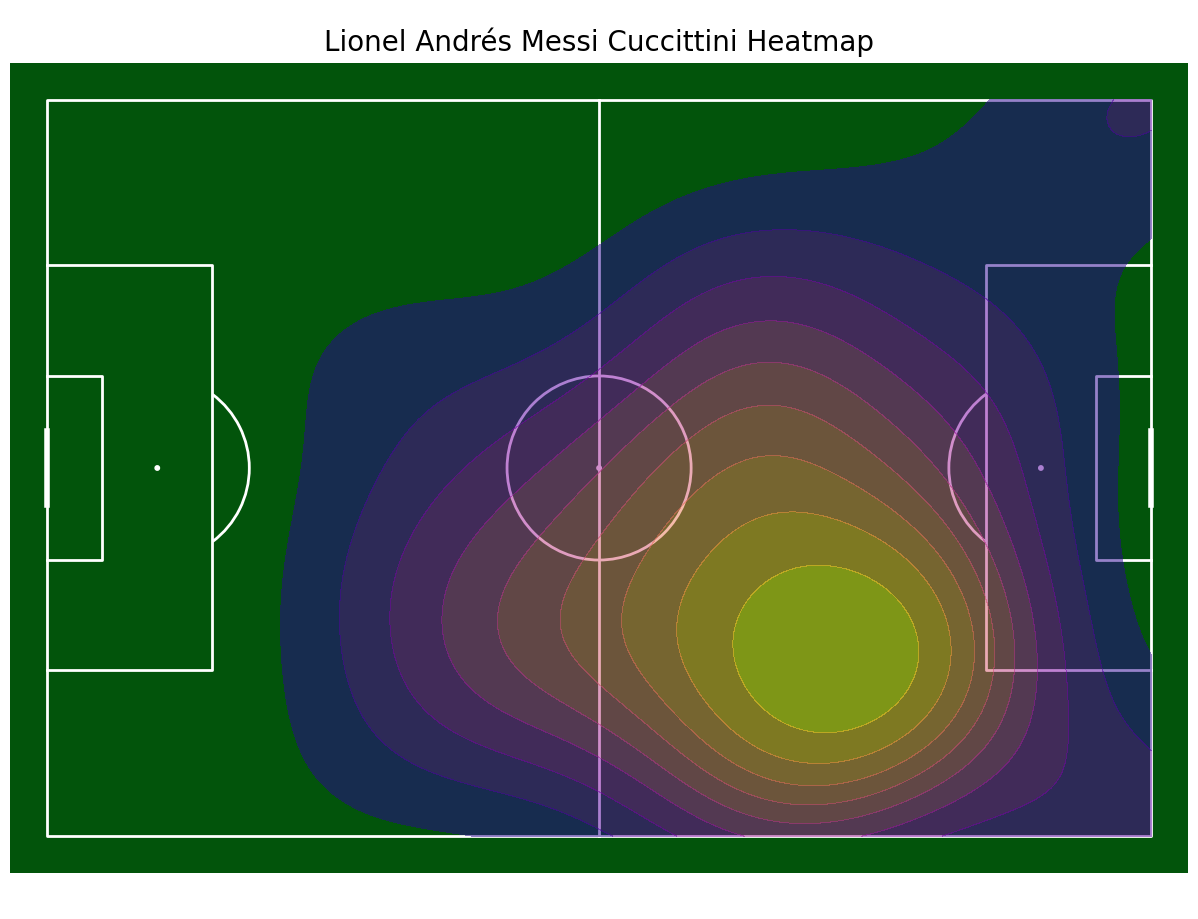

In [9]:
def generatePlayerHeatMap(player_name):
    player_filter = (df.type_name == 'Pass') & (df.player_name == player_name)
    player_df = df.loc[player_filter, ['x', 'y', 'end_x', 'end_y']]

    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax['pitch']
        )
    fig.suptitle(player_name+" Heatmap", fontsize = 20)
 
# we can do this for all players individually
generatePlayerHeatMap("Lionel Andrés Messi Cuccittini")

# 4. Plotting Heatmaps for the Team

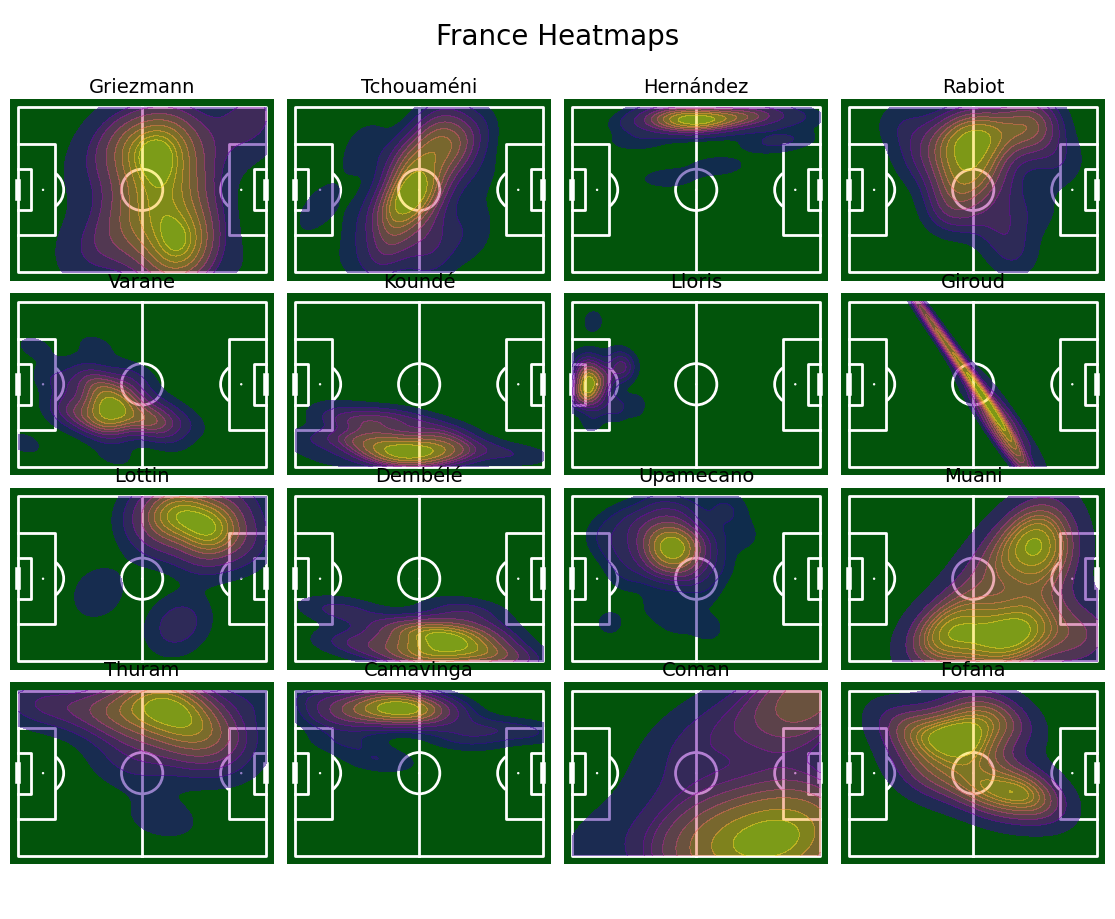

<Figure size 1400x1000 with 0 Axes>

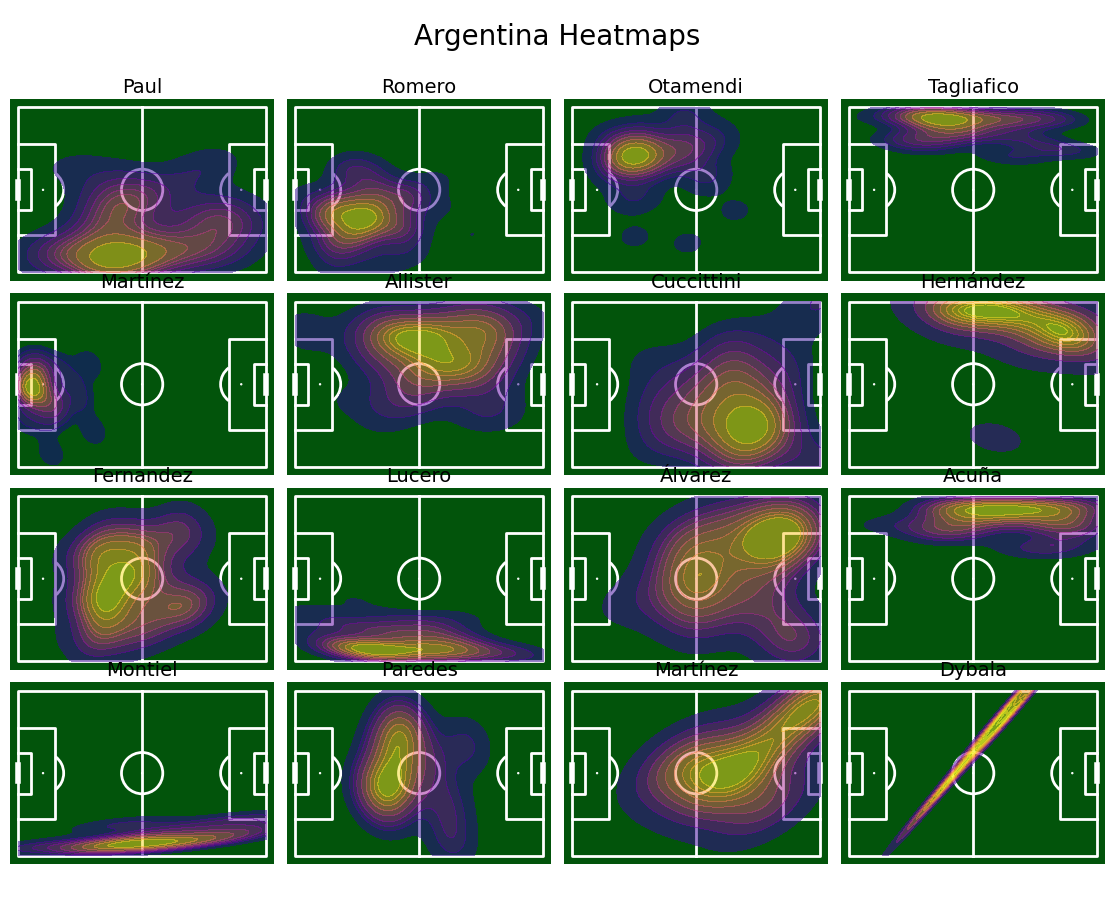

<Figure size 1400x1000 with 0 Axes>

In [10]:
def generatePlayerHeatmapGrid(team_name):
    # filtering to passes by team_name players
    team_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.sub_type_name != "Throw-in")
    # selecting only relevant columsn for the pass map
    team_passes = df.loc[team_passes, ['x', 'y', 'end_x', 'end_y', 'player_name','outcome_name']]
    #get the list of all players who made a pass
    names = team_passes['player_name'].unique()
    #draw 4x4 pitches
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
    plt.figure(figsize=(14,10))
    #for each player
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        #take only passes by this player
        player_df = team_passes.loc[team_passes["player_name"] == name]
        #put player name over the plot
        ax.text(60, -10, name.split()[-1],ha='center', va='center', fontsize=14)
        #Create the heatmap
        pitch.kdeplot(
            x=player_df['x'],
            y=player_df['y'],
            shade = True,
            shade_lowest=False,
            alpha=.5,
            n_levels=10,
            cmap = 'plasma',
            ax=ax
        )
    #We have more than enough pitches - remove them
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)
    
    #Another way to set title using mplsoccer
    axs['title'].text(0.5, 0.5, team_name+" Heatmaps", ha='center', va='center', fontsize=20)
    
    
    
    
    
generatePlayerHeatmapGrid("France")
generatePlayerHeatmapGrid("Argentina")

# 5. Analyzing the xG in the Game
The term `xG` stands for `expected goals from an action`. It means the general probability of an action resulting in a goal from that position based on historical actions taken from a similar region.

To plot the xG graph for a team:

1. Filter the data by team name.
2. Then filter out the irrelevant columns too.
3. Use a lineplot to plot the data of xG versus the minutes.

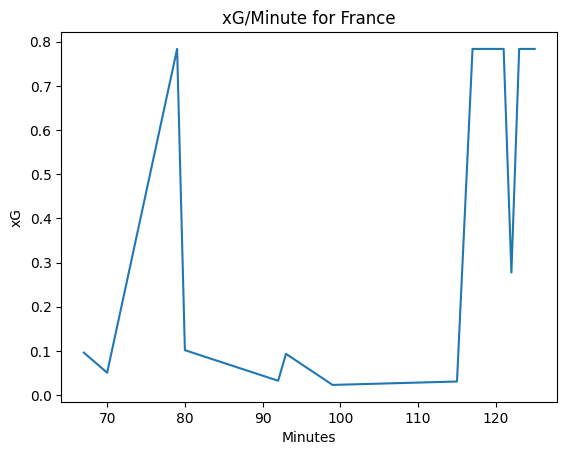

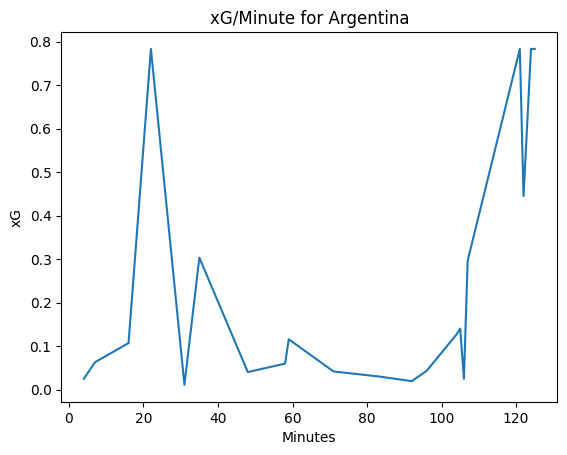

In [11]:
def generateTeamxGDataFrame(team_name):
    xg = df[['team_name','minute','type_name','shot_statsbomb_xg','x','y']]
    team_xg = xg[xg['team_name']==team_name].reset_index()
    return team_xg
    
def generatexGPlot(team_name):
    team_xg = generateTeamxGDataFrame(team_name)
    #xg_events[xg_events.shot_statsbomb_xg.isna()==False]
    plt.clf()
    sns.lineplot(data=team_xg,x='minute',y='shot_statsbomb_xg',ci=None)
    plt.xlabel("Minutes")
    plt.ylabel("xG")
    plt.title("xG/Minute for "+ team_name)
    plt.show()
    
    
    
 #calling the functions
generatexGPlot('France') # penalty shootout at the end
generatexGPlot('Argentina')

# 6. Plotting the Shot Map
To create a shot map for both teams in a single pitch, the steps are:

1. Filter the data by team name for both teams and store in different data frames.
2. Then filter out the irrelevant columns too.
3. Filter out by ‘type_name’ as ‘Shot’ only since we are only concerned with xG relating to shots.
4. Create an instance of class ‘Pitch’.
5. Use scatter plot for both teams to plot the x and y co-ordinates of the action but for one of the teams make the co-ordinates as 120-x and 80-y since it should show up on the other side of the pitch for simplicity. Use different bubble colors for the teams as well.
6. The size of the bubble should be xG value multiplied by a big number like 5000 or 4000, since it will allow us to see the bigger chance as a bigger bubble.
7. Put the text title on the plot.

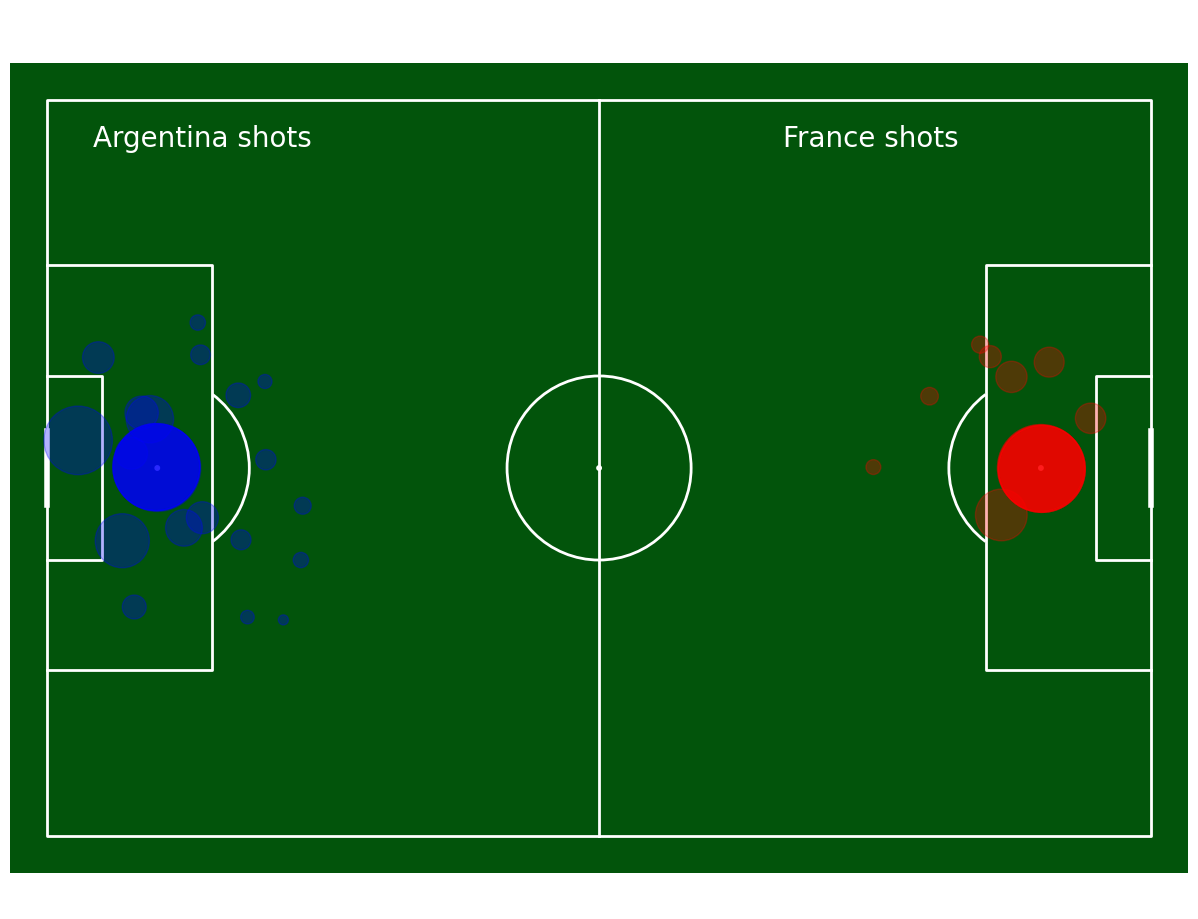

In [12]:
def generateCombinedShotMap(team1,team2):
    team1_xg = generateTeamxGDataFrame(team1)
    team2_xg = generateTeamxGDataFrame(team2)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    team2_shots = team2_xg[team2_xg.type_name=='Shot']
    
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    pitch.scatter(120-team2_shots.x, 80-team2_shots.y, alpha = 0.3, s = team2_shots.shot_statsbomb_xg*5000, color = "blue", ax=ax['pitch'],)
    ax['pitch'].text(5, 5, team2 + ' shots',color='white',size=20)
    ax['pitch'].text(80, 5, team1 + ' shots',color='white',size=20)
 
 
 # calling the function
generateCombinedShotMap('France','Argentina')

If you want to plot the shot map for only one team on half pitch then the code is:

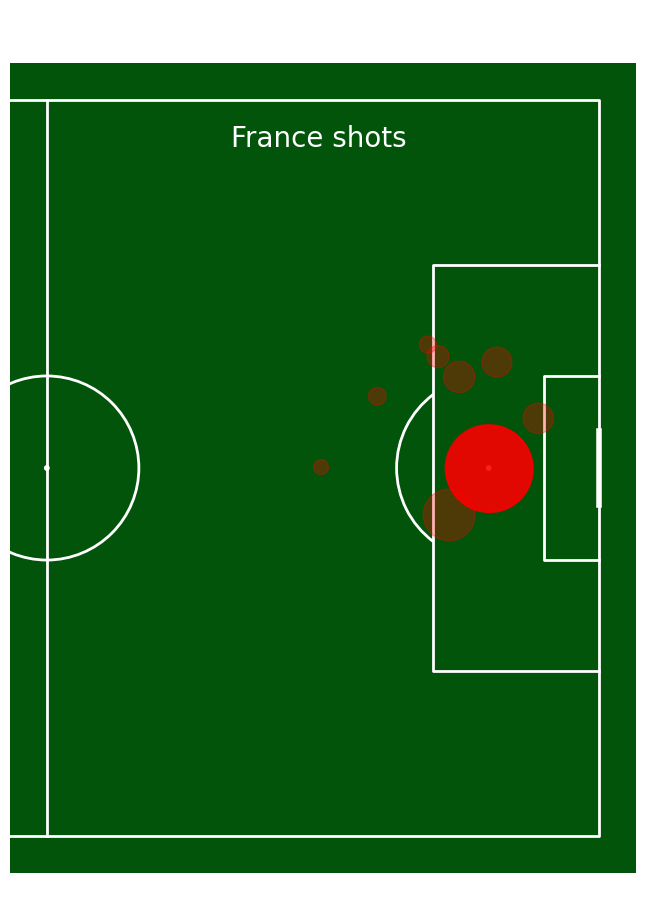

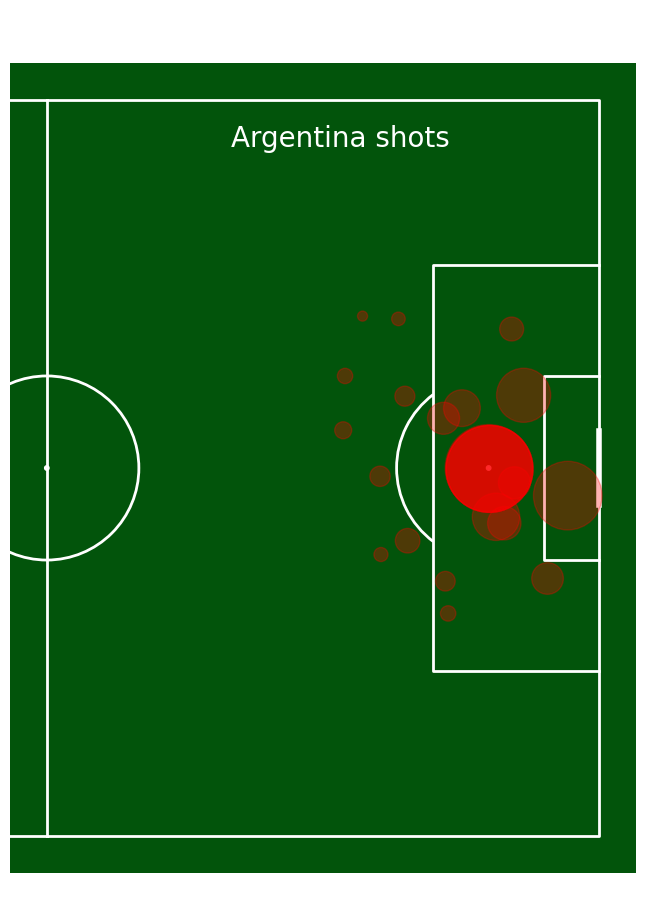

In [13]:
def generateTeamShotMap(team_name):
    team1_xg = generateTeamxGDataFrame(team_name)
    team1_shots = team1_xg[team1_xg.type_name=='Shot']
    pitch = Pitch(line_color='white',pitch_color='#02540b',half=True)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(team1_shots.x, team1_shots.y, alpha = 0.3, s = team1_shots.shot_statsbomb_xg*5000, color = "red", ax=ax['pitch'],)
    ax['pitch'].text(80, 5, team_name + ' shots',color='white',size=20)
 


# calling the functions
generateTeamShotMap('France')
generateTeamShotMap('Argentina')

# 7. Plotting the Passing Network
We can also plot the passing map for the team by using the average player positions during a pass action taken by them. 

- A passing network in football analytics refers to the visualization and analysis of the passing interactions between players on a football (soccer) team during a match. It involves mapping the connections and patterns of passes between players on the field. Passing networks can be highly informative in football analytics for several reasons:

1. `Team Performance Analysis:` Passing networks provide a visual representation of how well a team is working together in terms of ball circulation and teamwork. They can help analysts and coaches assess the effectiveness of a team's passing strategy.

2. `Player Roles and Contributions:` By examining passing networks, it becomes clear which players are central to the passing game and playmaker roles. It helps identify key passers and receivers, showcasing their contributions to the team's strategy.

3. `Formation Evaluation`: Passing networks can reveal the team's formation and positional organization during different phases of play (e.g., attacking, defending). This information can be valuable for assessing how well a team adheres to its tactical plan.

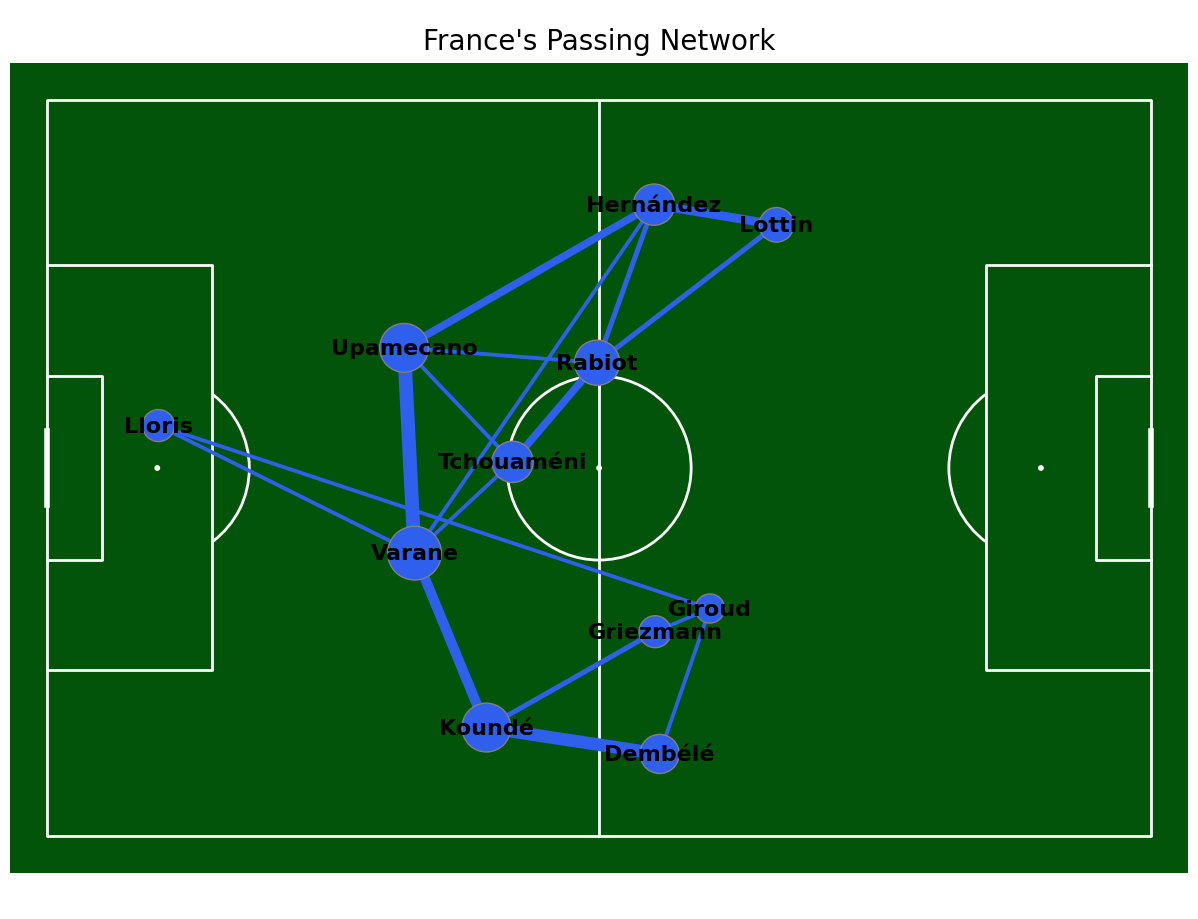

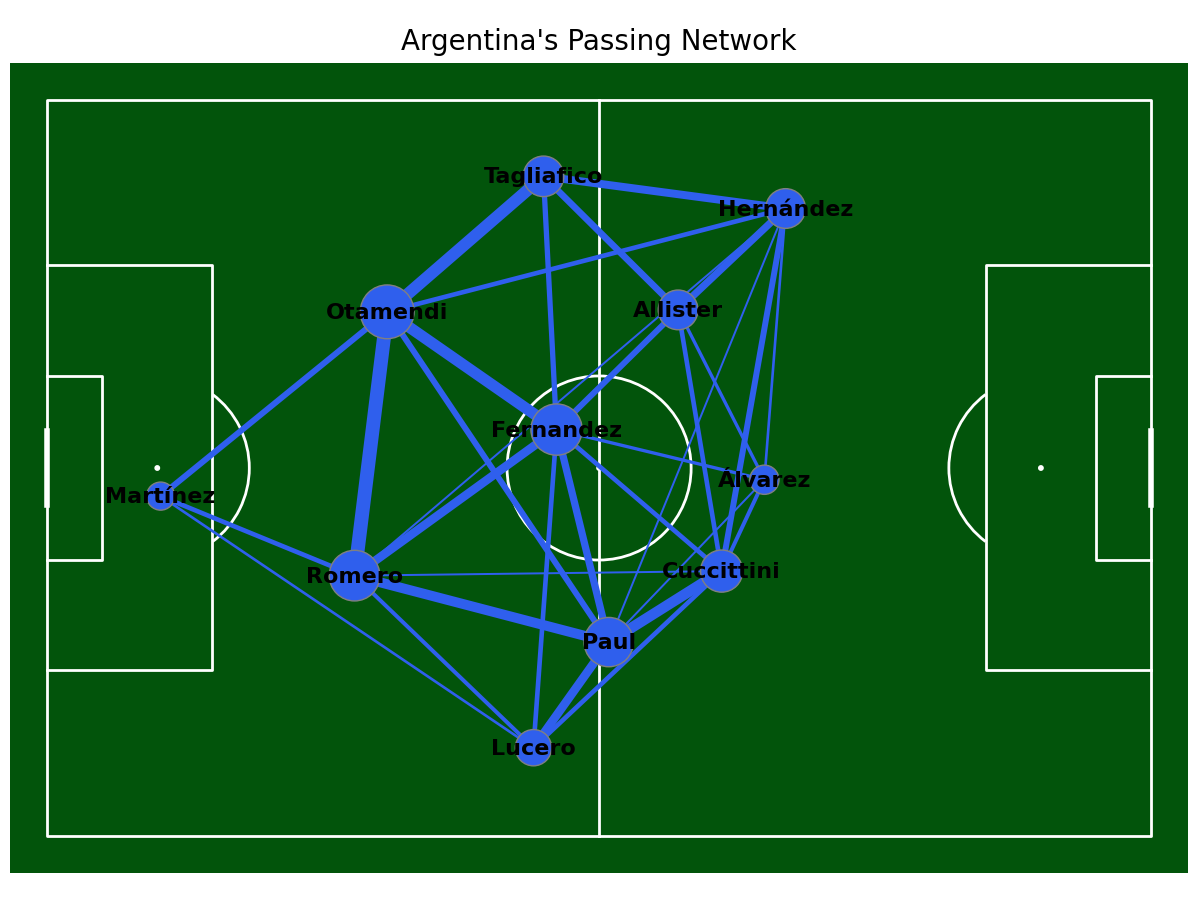

In [14]:
def generatePassingNetwork(team_name):
    #check for index of first sub
    sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == team_name].iloc[0]["index"]
    #make df with successfull passes by Real Madrid until the first substitution
    rm_passes = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    #taking necessary columns
    rm_pass = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    #adjusting that only the surname of a player is presented.
    rm_pass["player_name"] = rm_pass["player_name"].apply(lambda x: str(x).split()[-1])
    rm_pass["pass_recipient_name"] = rm_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
    
    scatter_df = pd.DataFrame()
    for i, name in enumerate(rm_pass["player_name"].unique()):
        passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
        recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
        recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
    #adjust the size of a circle so that the player who made more passes 
    scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)
    
    #counting passes between players
    rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #setting a threshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]
    
    #plot once again pitch and vertices
    pitch = Pitch(line_color='white',pitch_color='#02540b')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#2f5fed', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them 
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="#2f5fed", ax = ax["pitch"])
    fig.suptitle(team_name+"'s Passing Network", fontsize = 20)
    
    
    
    
# calling the function
generatePassingNetwork("France")
generatePassingNetwork("Argentina")

# Why Did I Choose The Statsbomb Dataset?
# SkillCorner/opendata:

#### Pros:
- It contains a wide range of event data, including tracking data, which can be valuable for player analysis and performance evaluation.

#### Cons:

- The wide variety of data types and complexity of tracking data may require some learning for those new to football analytics.
- You may need to invest time in understanding the data schema and how to extract relevant information for player analysis.

# statsbomb/open-data:

#### Pros:

- StatsBomb is known for its high-quality football data, and this dataset is comprehensive, providing a rich source of information.
- The dataset includes event data, advanced metrics, and tactical information, which can be beneficial for in-depth player analysis.
- It is well-documented, and StatsBomb offers resources and tutorials to assist users in working with the data.

#### Cons:

- The dataset can be extensive and may require more advanced data processing skills, especially if you want to utilize the full range of available data.
- Users may need a deeper understanding of football analytics to leverage the data effectively.


# What Have I Done?


1. Data Cleaning: 
- Check for missing data points in the tracking data and decide on an appropriate strategy for handling them (e.g., interpolation or removal). Identify and address any outliers or erroneous data points.

2. Visualization:
- Create heatmaps of player positions to visualize areas of player concentration on the field.
- Generate pass maps to analyze passing patterns between players.
- Plot player trajectories to visualize player movements throughout the match.

3. Player Performance Analysis:
- Compare player performance between teams.

# Future Recommendations
1. Team Analysis:
- Analyze team-level statistics, including ball possession percentages, pass completion rates, and team formations.
- Visualize team formations and their evolution throughout the match.
- Investigate defensive strategies and pressing patterns.

2. Player Performance Analysis:
- Calculate the distance covered by a player during a match or across multiple matches. This metric can help assess a player's work rate and endurance.
- Analyze a player's positioning relative to the ball, teammates, and opponents. You can assess how well a player maintains the desired tactical position and adjusts to different game situations.
- Allow users to compare a player's performance across multiple matches to identify trends, improvements, or areas that need development.

3. User Interface: 
- Develop a user-friendly interface where users can select a player, choose specific matches or periods, and view detailed performance metrics and visualizations.